# Вариант 5

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
data = [125,
        185, 
        184, 
        198, 
        89, 
        95, 
        196, 
        143, 
        97, 
        199, 
        154, 
        105, 
        147, 
        103, 
        121, 
        107, 
        142, 
        165, 
        200, 
        108, 
        184, 
        154, 
        189, 
        184, 
        142, 
        137, 
        165, 
        124, 
        130, 
        106, 
        150, 
        222, 
        220, 
        237, 
        106, 
        114, 
        235, 
        171, 
        116, 
        238, 
        184, 
        126, 
        176, 
        123, 
        145, 
        128, 
        170, 
        198, 
        240, 
        129, 
        220, 
        184, 
        226, 
        220, 
        170, 
        164]

df = pd.DataFrame({'data': data})
df

,data
0,125
1,185
2,184
3,198
4,89
5,95
6,196
7,143
8,97
9,199


**1.	Ранжировать ряд данных сортировкой по значениям от минимального к максимальному.**

In [3]:
df.sort_values(by='data')

,data
4,89
5,95
8,97
13,103
11,105
34,106
29,106
15,107
19,108
35,114


**2.	Рассчитать количество интервалов по формуле Стерджеса, округлив вверх до целых единиц.**

In [4]:
N = len(df)
n = 1 + math.log2(N)

print('Количество элементов = {}'.format(N))
print('Количество интервалов по формуле Стерджеса до округления = {}'.format(n))

n = math.floor(n)
print('Количество интервалов после округления = {}'.format(n))

Количество элементов = 56
Количество интервалов по формуле Стерджеса до округления = 6.807354922057604
Количество интервалов после округления = 6


**3.	Рассчитать величину интервала h, округлить до десятков.**

In [5]:
df_min = df['data'].min()
df_max = df['data'].max()
print('min = {}, max = {}'.format(df_min, df_max))

h = (df_max - df_min) / n
print('Шаг интервала до округления = {}'.format(h))

h = int(round(h * 0.1) * 10)
print('Шаг интервала после округления = {}'.format(h))

min = 89, max = 240
Шаг интервала до округления = 25.166666666666668
Шаг интервала после округления = 30


**4.	Рассчитать границы интервалов:**

In [6]:
intervals = pd.interval_range(start=df_min, periods=n, freq=h, closed='left')
print(intervals)

IntervalIndex([[89, 119), [119, 149), [149, 179), [179, 209), [209, 239), [239, 269)]
              closed='left',
              dtype='interval[int64]')


**5.	Подсчитать количество единиц совокупности, принадлежащих каждому из интервалов.**

In [7]:
out = pd.cut(df['data'], bins=intervals).value_counts()
out = out.sort_index()
out

[89, 119)     11
[119, 149)    14
[149, 179)    10
[179, 209)    12
[209, 239)     8
[239, 269)     1
Name: data, dtype: int64

**7.	Построить гистограмму распределения для интервалов и полигон распределения для вариант, кумуляту.**

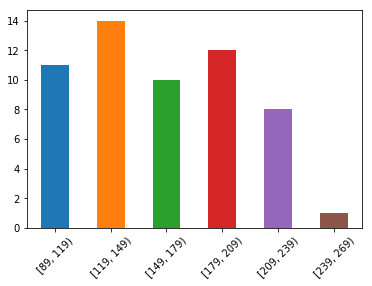

In [8]:
out.plot.bar(rot=45)

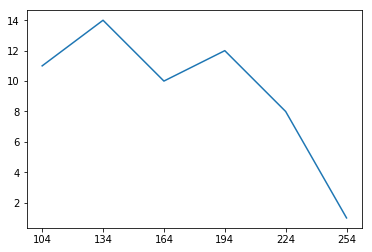

In [9]:
ax = pd.DataFrame({'Полигон':out.values}, index=[i.mid for i in out.index]).plot(legend=False)
ax.set_xticks([i.mid for i in out.index])

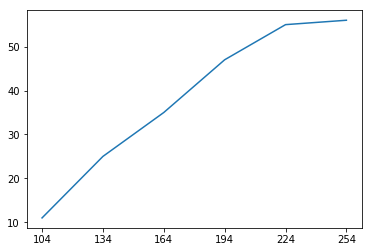

In [10]:
ax = pd.DataFrame({'Кумулята':[sum(out.values[:i+1]) for i in range(len(out.values))]},
                  index=[i.mid for i in out.index]).plot(legend=False)
ax.set_xticks([i.mid for i in out.index])

**8.	Вычислить среднее арифметическое, моду, медиану, квартили, децили.**

In [11]:
mean = df['data'].mean()
print('Среднее арифметическое = {:.2f}'.format(mean))

Среднее арифметическое = 160.54


In [12]:
print('Мода = {}'.format(df.mode().loc[0, 'data']))

Мода = 184


In [13]:
print('Медиана = {}'.format(df['data'].median()))

Медиана = 159.0


In [14]:
for i, q in enumerate(np.arange(0.25, 1, 0.25)):
    print('Q{} = {}'.format(i+1, df['data'].quantile(q)))

Q1 = 124.75
Q2 = 159.0
Q3 = 190.75


In [15]:
for i, d in enumerate(np.arange(0.1, 1, 0.1)):
    print('d{} = {}'.format(i+1, df['data'].quantile(d)))

d1 = 106.0
d2 = 121.0
d3 = 128.5
d4 = 143.0
d5 = 159.0
d6 = 171.0
d7 = 184.0
d8 = 198.0
d9 = 221.0


**9.	Вычислить показатели вариации: R, dср, s2, s, Vr, Vd , V. Вычислить асимметрию и эксцесс**

In [16]:
R = df_max - df_min
print('Размах вариации = {}'.format(R))

Размах вариации = 151


In [17]:
d = sum(abs(df['data'] - df['data'].mean())) / len(df)
print('Среднее линейное отклонение = {:.2f}'.format(d))

Среднее линейное отклонение = 36.75


In [18]:
s2 = df['data'].var()
print('Дисперсия = {:.2f}'.format(s2))

Дисперсия = 1849.20


In [19]:
s = df['data'].std()
print('Среднеквадратичное отклонение = {:.2f}'.format(s))

Среднеквадратичное отклонение = 43.00


In [20]:
Vr = R / mean
print('Коэффициент осцилляции = {:.2f}'.format(Vr))

Коэффициент осцилляции = 0.94


In [21]:
Vd = d / mean
print('Линейный коэффициент вариации = {:.2f}'.format(Vd))

Линейный коэффициент вариации = 0.23


In [22]:
V = d / mean
print('Коэффициент вариации = {:.2%}'.format(Vd))

Коэффициент вариации = 22.89%


In [23]:
print('Ассиметрия = {:.2f}'.format(st.kurtosis(df['data'])))

Ассиметрия = -1.05


In [24]:
print('Эксцесс = {:.2f}'.format(st.skew(df['data'])))

Эксцесс = 0.20


**10.	Сделать вывод об однородности вариационного ряда, о симметричности и остро- или плоско-вершинности распределения.**

- Коэффициент вариации позволяет судить об однородности совокупности: 17% – 33% – **достаточно однородная**;
- Ассиметрия < 0: **левосторонняя асимметрия**;
- Эксцесс > 0: **распределение является островершинным**.

In [25]:
[str(c) for c in out.index]

['[89, 119)',
 '[119, 149)',
 '[149, 179)',
 '[179, 209)',
 '[209, 239)',
 '[239, 269)']